<a href="https://colab.research.google.com/github/AbdulMoiz001/FreshpickAi/blob/main/fruit_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing Tesorflow-gpu for setup

In [ ]:
!pip install tensorflow-gpu

Mounting The Drive with Data Set

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Intall to save models in HDF5

In [ ]:
# Required to save models in HDF5 format
!pip install pyyaml h5py

Checking GPU informations

In [ ]:
#!nvidia-smi

INITIALIZATION

In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/dataset/fruits-classification/dataset/train/rottenapples/rotated_by_15_Screen Shot 2018-06-08 at 2.42.22 PM.png
/content/drive/MyDrive/dataset/fruits-classification/dataset/train/rottenapples/rotated_by_30_Screen Shot 2018-06-07 at 2.24.47 PM.png
/content/drive/MyDrive/dataset/fruits-classification/dataset/train/rottenapples/rotated_by_30_Screen Shot 2018-06-07 at 2.16.54 PM.png
/content/drive/MyDrive/dataset/fruits-classification/dataset/train/rottenapples/rotated_by_15_Screen Shot 2018-06-08 at 2.35.32 PM.png
/content/drive/MyDrive/dataset/fruits-classification/dataset/train/rottenapples/rotated_by_15_Screen Shot 2018-06-08 at 2.47.49 PM.png
/content/drive/MyDrive/dataset/fruits-classification/dataset/train/rottenapples/rotated_by_15_Screen Shot 2018-06-08 at 2.40.56 PM.png
/content/drive/MyDrive/dataset/fruits-classification/dataset/train/rottenapples/rotated_by_30_Screen Shot 2018-06-07 at 2.17.25 PM.png
/con

Importing Libraries

In [ ]:
# Importing libraries
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from IPython.display import display, Image # for displaying images
%matplotlib inline
import os
import pandas as pd
import numpy as np

Find labels of images

In [ ]:
# Getting labels of training data
labels = os.listdir('/content/drive/MyDrive/dataset/fruits-classification/dataset/dataset/train')
labels

['freshapples',
 'freshbanana',
 'freshoranges',
 'rottenapples',
 'rottenbanana',
 'rottenoranges']

Display Sample Images


 FRESHAPPLES


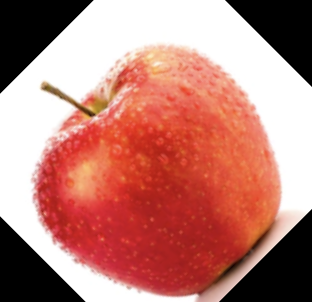

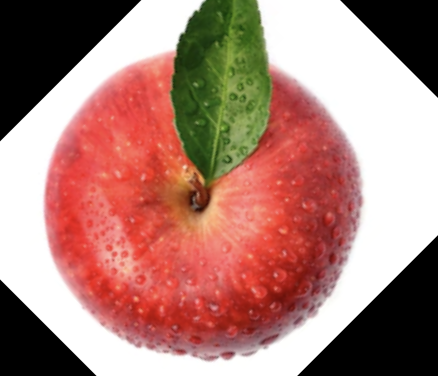

there are  1693  images in  freshapples class

 FRESHBANANA


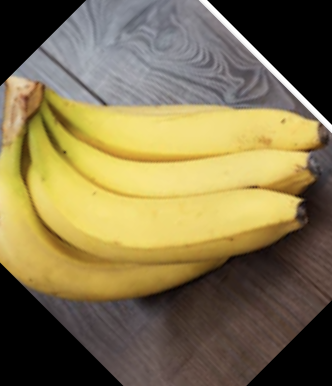

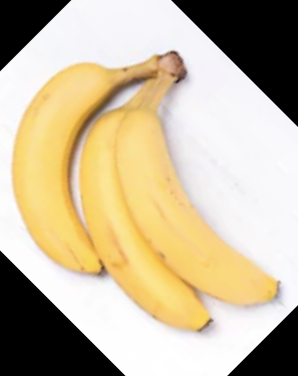

there are  1581  images in  freshbanana class

 FRESHORANGES


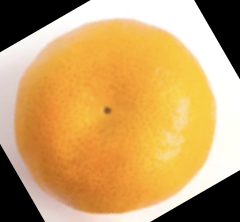

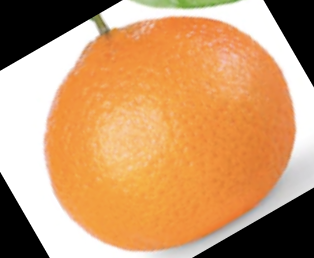

there are  1466  images in  freshoranges class

 ROTTENAPPLES


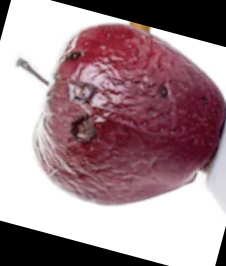

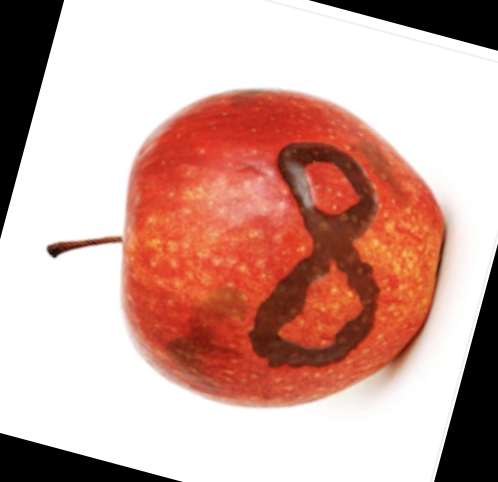

there are  2342  images in  rottenapples class

 ROTTENBANANA


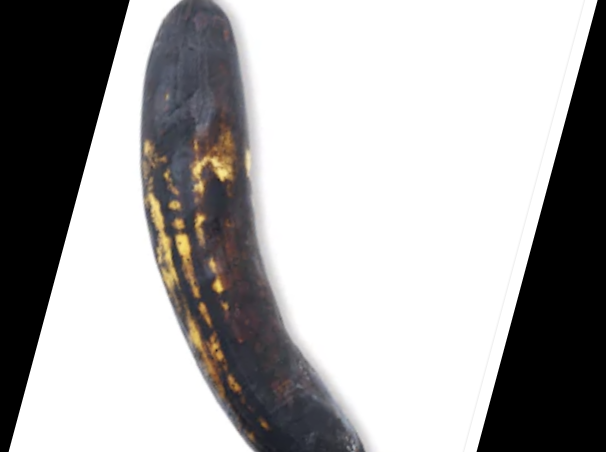

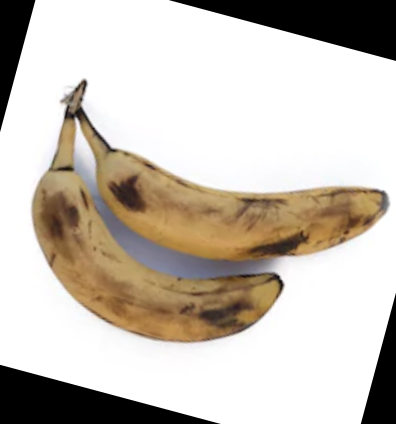

there are  2224  images in  rottenbanana class

 ROTTENORANGES


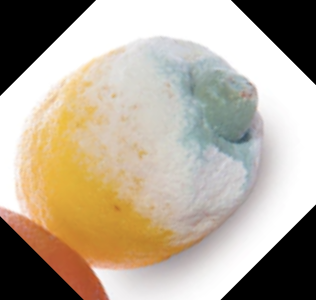

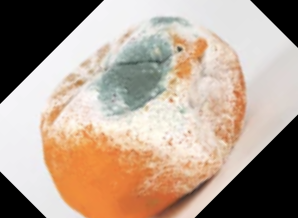

there are  1595  images in  rottenoranges class


In [ ]:
num = []

for i in labels:
  path = '/content/drive/MyDrive/dataset/fruits-classification/dataset/dataset/train/{0}/'.format(i)
  folder_data = os.listdir(path)
  k=0
  print('\n', i.upper())
  for j in folder_data:
    if(k<2):
      display(Image(path+j))
    k=k+1
  num.append(k)
  print('there are ', k,' images in ', i, 'class')

Get image according to their classes

In [ ]:
# Get images from files using ImageDataGenerator

from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

tg = datagen.flow_from_directory(directory='/content/drive/MyDrive/dataset/fruits-classification/dataset/dataset/train', target_size=(20,20), classes=labels, batch_size=25, subset='training')
vg = datagen.flow_from_directory(directory='/content/drive/MyDrive/dataset/fruits-classification/dataset/dataset/train', target_size=(20,20), classes=labels, batch_size=25, subset='validation')

Found 8723 images belonging to 6 classes.
Found 2178 images belonging to 6 classes.


Building the model

In [ ]:
# # building model
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape = (20,20,3)))
# model.add(tf.keras.layers.MaxPool2D((2,2)))

# model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
# model.add(tf.keras.layers.MaxPool2D((2,2)))

# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(128, activation='relu'))
# model.add(tf.keras.layers.Dense(128, activation='relu'))

# model.add(tf.keras.layers.Dense(6, activation='softmax'))

Compiling the model

In [ ]:
# # Compile model
# model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

Summary()

In [ ]:
# model.summary(line_length=None, positions=None, print_fn=None)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 18, 18, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               73856     
_________________________________________________________________
dense_7 (Dense)              (None, 128)              

--------------------- RUN ANY ONE OF THE FOLLOWING PARTS ---------------------

(A) Training Our Main model

In [ ]:
# Train model
# history = model.fit_generator(generator=tg, steps_per_epoch=len(tg), epochs=8, validation_data=vg, validation_steps=len(vg))

Important Plots

In [ ]:
# # Accuracy
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('Model Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend(['Acc','Val'], loc = 'upper left')

In [ ]:
# # Loss
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend(['loss','Val'], loc = 'upper left')

(B) Training and Saving the model, Then creating a new_model from the saved one. (If so the test the "new_model")

In [ ]:
# # Train model
# history = model.fit_generator(generator=tg, steps_per_epoch=len(tg), epochs=8, validation_data=vg, validation_steps=len(vg))

# # Save model
# # Save the entire model as a SavedModel.
# !mkdir -p saved_model
# model.save('saved_model/my_model')

In [ ]:
# # my_model directory
# !ls saved_model

# # Contains an assets folder, saved_model.pb, and variables folder.
# !ls saved_model/my_model

In [ ]:
# new_model = tf.keras.models.load_model('saved_model/my_model')

# # Check its architecture
# new_model.summary()

(C) Training and Saving model as HDF5 file, Then creating a new_model from the saved one. (If so the test the "new_model")

In [ ]:
# # Train model
# history = model.fit_generator(generator=tg, steps_per_epoch=len(tg), epochs=8, validation_data=vg, validation_steps=len(vg))

# # Save the entire model to a HDF5 file.
# # The '.h5' extension indicates that the model should be saved to HDF5.
# model.save('my_model.h5')

In [ ]:
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('my_model.h5')

# Show the model architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 18, 18, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               73856     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1

(D) Training and Saving model as weights manually, Then creating a new_model from the saved one. (If so the test the "new_model")

In [ ]:
# # Train model
# history = model.fit_generator(generator=tg, steps_per_epoch=len(tg), epochs=8, validation_data=vg, validation_steps=len(vg))

# # Save the weights
# model.save_weights('myfirst_.h5')

In [ ]:
# # Create a new model instance
# new_model = create_model()

# # Restore the weights
# new_model.load_weights('myfirst_.h5')

# # Show the model architecture
# new_model.summary()

Testing the "model"

In [ ]:
# new_model.load_weights('myfirst_.h5')


In [ ]:
# Getting labels of training data
labels_test = os.listdir('/content/drive/MyDrive/dataset/fruits-classification/dataset/dataset/test')
print(labels_test)

['freshapples', 'freshbanana', 'freshoranges', 'rottenapples', 'rottenbanana', 'rottenoranges']


In [ ]:
#Loading the test data
test_set = datagen.flow_from_directory(directory='/content/drive/MyDrive/dataset/fruits-classification/dataset/dataset/TESTING', target_size=(20,20), classes=labels_test, batch_size=30, subset=None)


Found 22 images belonging to 6 classes.


In [ ]:
# If used option onther than '(A)' for training use "new_model" insted of "model"
prediction = new_model.predict_classes(test_set)
print("predictions class:", prediction)


loss, acc = new_model.evaluate(test_set, verbose=2)
print("trained model, accuracy: {:5.2f}%".format(100 * acc))

#Fresh Apple = 0
# Fresh Banana = 1
# Fresh Orange = 2
# Rotten Apple = 3
# Rotten Banana = 4
# Rotten Orange = 5


#print(prediction)
#pd.crosstab(test_set)
# Cross-Tab/Contingency Table statement
#confusion_matrix(test_set,labels_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


predictions class: [0 0 0 3 0 0 3 0 3 0 0 0 3 0 0 0 0 0 0 3 0 3]
1/1 - 0s - loss: 8.9471 - accuracy: 0.0909
trained model, accuracy:  9.09%


All the way Save (Choose plan A)

In [ ]:
# (B) Save model
# # Save the entire model as a SavedModel.
# !mkdir -p saved_model
# model.save('saved_model/my_model')

# # (C) Save the entire model to a HDF5 file.
# # The '.h5' extension indicates that the model should be saved to HDF5.
# model.save('my_model.h5')

# # (D) Save the weights
# model.save_weights('myfirst_.h5')